In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def get_generator(x, y, batch_size=1):
    for i in range(len(x) // batch_size):
        yield (x[i * batch_size: (i + 1) * batch_size], y[i * batch_size: (i + 1) * batch_size])

def monochrome(x):
    def _average_color_channel(a):
        averaged = np.mean(a)
        return [averaged, averaged, averaged]
    x = np.apply_along_axis(_average_color_channel, -1, x)
    return x

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
train_generator = get_generator(x_train, y_train)

image_generator = ImageDataGenerator(preprocessing_function=monochrome, horizontal_flip=True, height_shift_range=0.2, rotation_range=30, rescale=1/255.)
image_generator.fit(x_train)
image_generator_iterable = image_generator.flow(x=x_train,y=y_train, batch_size=1, shuffle=False)

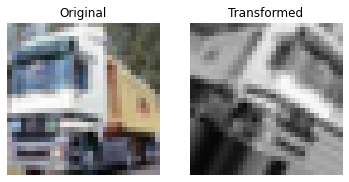

In [20]:
image_transformed, label_transformed = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_orig[0])
ax[0].set_title("Original")
ax[0].set_axis_off()
ax[1].imshow(image_transformed[0])
ax[1].set_title("Transformed")
ax[1].set_axis_off()
plt.show()